# Project - Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing dataset

In [2]:
data = pd.read_csv('./data/diamonds.csv')
diamonds= data.copy()

In [3]:
diamonds.shape

(48940, 10)

In [4]:
diam_rick = pd.read_csv('./data/rick_diamonds.csv')
diam_rick.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [5]:
diam_rick.shape

(5000, 9)

In [6]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [7]:
diam_rick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   object 
 2   color    5000 non-null   object 
 3   clarity  5000 non-null   object 
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   x        5000 non-null   float64
 7   y        5000 non-null   float64
 8   z        5000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 351.7+ KB


# Features

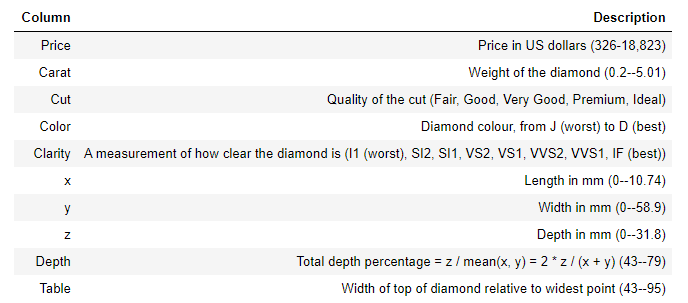

>- Qualitative Features (Categorical) : cut, color, clarity.
>- Quantitative Features (Numerical) : carat, depth , table , price , x , y, z


# Categorial to Numerical (cut, color, clarity)

## Cut column (categorical to numerical)

In [8]:
diamonds.cut.value_counts()

Ideal        19608
Premium      12507
Very Good    10922
Good          4443
Fair          1460
Name: cut, dtype: int64

In [9]:
# Quality in increasing order Fair, Good, Very Good, Premium, Ideal
diamonds.replace({'Fair'     : 1, 
                  'Good'     : 2,
                  'Very Good': 3,
                  'Premium'  : 4,
                  'Ideal'    : 5}, inplace=True)

In [10]:
diam_rick.cut.value_counts()

Ideal        1943
Premium      1284
Very Good    1160
Good          463
Fair          150
Name: cut, dtype: int64

In [11]:
diam_rick.replace({'Fair'    : 1, 
                  'Good'     : 2,
                  'Very Good': 3,
                  'Premium'  : 4,
                  'Ideal'    : 5}, inplace=True)

## Color column (categorical to numerical)

In [12]:
diamonds.color.value_counts()

G    10287
E     8869
F     8653
H     7542
D     6160
I     4889
J     2540
Name: color, dtype: int64

In [13]:
# With D being the best and J the worst.
diamonds.replace({'J': 1, 
                  'I': 2,
                  'H': 3,
                  'G': 4,
                  'F': 5,
                  'E': 6,
                  'D': 7 }, inplace=True)

In [14]:
diam_rick.color.value_counts()

G    1005
E     928
F     889
H     762
D     615
I     533
J     268
Name: color, dtype: int64

In [15]:
diam_rick.replace({'J':1, 
                  'I': 2,
                  'H': 3,
                  'G': 4,
                  'F': 5,
                  'E': 6,
                  'D': 7 }, inplace=True)

In [16]:
## Clarity column (categorical to Numerical)

In [17]:
diamonds.clarity.value_counts()

SI1     11832
VS2     11125
SI2      8307
VS1      7449
VVS2     4635
VVS1     3321
IF       1613
I1        658
Name: clarity, dtype: int64

In [18]:
# In order from Worst to Best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF
diamonds.replace({'I1':  1,
                  'SI2': 2,
                  'SI1': 3,
                  'VS2': 4,
                  'VS1': 5,
                 'VVS2': 6,
                 'VVS1': 7,
                   'IF': 8}, inplace=True)

In [19]:
diam_rick.clarity.value_counts()

SI1     1233
VS2     1133
SI2      887
VS1      722
VVS2     431
VVS1     334
IF       177
I1        83
Name: clarity, dtype: int64

In [20]:
diam_rick.replace({'I1': 1,
                  'SI2': 2,
                  'SI1': 3,
                  'VS2': 4,
                  'VS1': 5,
                 'VVS2': 6,
                 'VVS1': 7,
                   'IF': 8}, inplace=True)

In [21]:
# Examine NaN Val
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [22]:
diam_rick.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

##  xyz ==0 

In [23]:
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,3.906416,4.407254,4.055456,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.116568,1.699858,1.645542,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


> - Note that `min` values of x, y, z are equal to ZERO which are impossible in real life 

In [24]:
diam_rick.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.799144,3.881400,4.39160,4.007600,61.724680,57.516140,5.735516,5.736410,3.539576
std,0.472936,1.116774,1.71337,1.662196,1.457691,2.244019,1.120300,1.110345,0.694733
min,0.200000,1.000000,1.00000,1.000000,44.000000,50.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.00000,3.000000,61.000000,56.000000,4.720000,4.720000,2.910000
50%,0.710000,4.000000,4.00000,4.000000,61.800000,57.000000,5.710000,5.720000,3.530000
75%,1.040000,5.000000,6.00000,5.000000,62.500000,59.000000,6.530000,6.520000,4.032500
max,4.130000,5.000000,7.00000,8.000000,73.600000,70.000000,10.000000,9.850000,6.430000


In [25]:
df_rick = diam_rick.loc[(diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)]
df_rick

,carat,cut,color,clarity,depth,table,x,y,z
2010,0.39,5,4,5,61.3,56.0,4.68,4.71,2.88
2104,1.08,3,2,5,62.5,57.0,6.51,6.54,4.08
4323,0.40,2,4,4,62.8,54.4,4.67,4.70,2.94
4941,2.08,4,2,7,62.2,58.0,8.22,8.18,5.10


In [26]:
df = diamonds.loc[(diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
2010,1.00,4,4,2,59.1,59.0,3142,6.55,6.48,0.0
2104,1.01,4,3,1,58.1,59.0,3167,6.66,6.60,0.0
4323,1.10,4,4,2,63.0,59.0,3696,6.50,6.47,0.0
4941,1.01,4,5,2,59.2,58.0,3837,6.50,6.47,0.0
9187,1.50,2,4,1,64.0,61.0,4731,7.15,7.04,0.0
10119,1.07,5,5,2,61.6,56.0,4954,0.00,6.62,0.0
10825,1.00,3,3,4,63.3,53.0,5139,0.00,0.00,0.0
12290,1.15,5,4,4,59.2,56.0,5564,6.88,6.83,0.0
14433,1.14,1,4,5,57.5,67.0,6381,0.00,0.00,0.0
22126,2.18,4,3,2,59.4,61.0,12631,8.49,8.45,0.0


In [27]:
df.shape

(18, 10)

In [28]:
data = df.loc[(df['x'] > 0) & (df['y'] > 0) & (df['z'] == 0)].reset_index()
data

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,2010,1.00,4,4,2,59.1,59.0,3142,6.55,6.48,0.0
1,2104,1.01,4,3,1,58.1,59.0,3167,6.66,6.60,0.0
2,4323,1.10,4,4,2,63.0,59.0,3696,6.50,6.47,0.0
3,4941,1.01,4,5,2,59.2,58.0,3837,6.50,6.47,0.0
4,9187,1.50,2,4,1,64.0,61.0,4731,7.15,7.04,0.0
5,12290,1.15,5,4,4,59.2,56.0,5564,6.88,6.83,0.0
6,22126,2.18,4,3,2,59.4,61.0,12631,8.49,8.45,0.0
7,23691,2.25,4,2,3,61.3,58.0,15397,8.52,8.42,0.0
8,24573,2.20,4,3,3,61.2,59.0,17265,8.42,8.37,0.0
9,24934,2.02,4,3,4,62.7,53.0,18207,8.02,7.95,0.0


In [29]:
(np.mean([data.iloc[0]['x'], data.iloc[0]['y']]) * data.iloc[0]['depth'])/100

3.8503650000000005

In [30]:
((data.iloc[0]['x'] + data.iloc[0]['y'])/2 * data.iloc[0]['depth'])/100

3.8503650000000005

In [31]:
diamonds.loc[((diamonds['x'] > 0) & (diamonds['y'] > 0) & (diamonds['z'] == 0)),'z'] = ((diamonds['x'] + diamonds['y'])/2 * diamonds['depth'])/100

diamonds.loc[((diamonds['x'] > 0) & (diamonds['y'] > 0)),:]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
1,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
2,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
3,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,4,7,3,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56


# First Insight of dataset

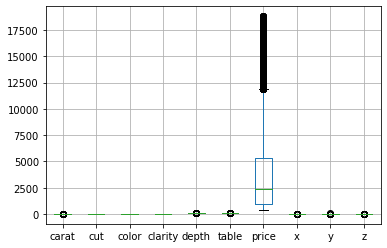

In [32]:
diamonds.boxplot()

In [33]:
#sns.pairplot(diamonds)

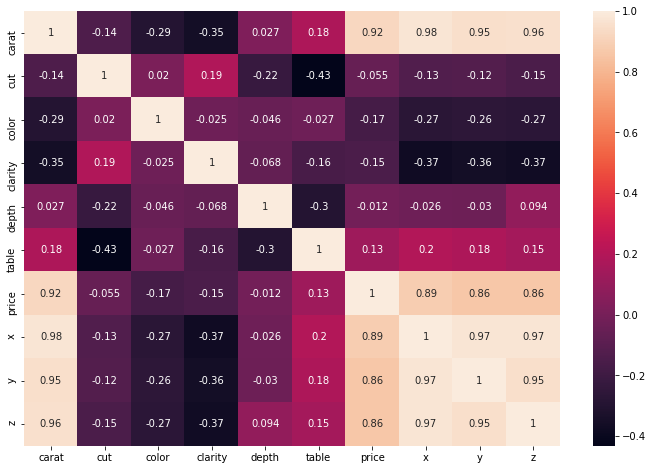

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(diamonds.corr(), annot=True)

## First Analysis

- The Price of the Diamond is highly correlated to Carat, and its dimensions (x,y,z)
- The x , Width(y) and Height(z) seems to be higly related to Price and even each other   

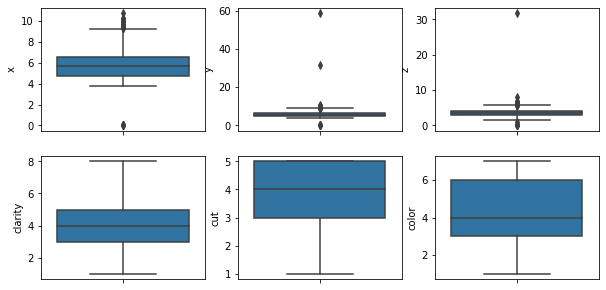

In [35]:
fig, ax = plt.subplots(2,3, figsize=(10, 5))

sns.boxplot(y=diamonds.x, ax=ax[0][0])
sns.boxplot(y=diamonds.y, ax=ax[0][1])
sns.boxplot(y=diamonds.z, ax=ax[0][2])
sns.boxplot(y=diamonds.clarity, ax=ax[1][0])
sns.boxplot(y=diamonds.cut, ax=ax[1][1])
sns.boxplot(y=diamonds.color, ax=ax[1][2])

# Creating model for each group of Clarity

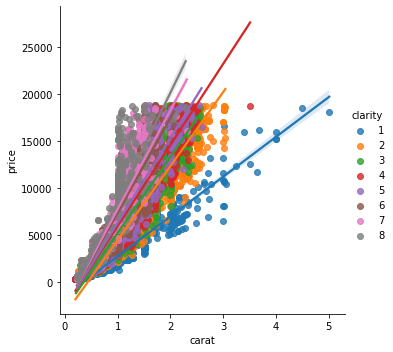

In [36]:
sns.lmplot(x='carat', y='price', data=diamonds, hue='clarity')

In [37]:
clarity_lst = sorted(diamonds.clarity.unique())
dfs = [diamonds.query(f'(clarity =="{x}")') for x in clarity_lst]

In [38]:
clarity_lst

[1, 2, 3, 4, 5, 6, 7, 8]

In [39]:
for i in dfs:
    print(len(i))

658
8307
11832
11125
7449
4635
3321
1613


In [40]:
def create_model(dataframe):
    '''
    criando uma função que gera um modelo para cada dataframe input
    '''
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    X = dataframe[['carat', 'cut', 'clarity',
                  'color', 'depth', 'table', 'x', 'y', 'z']]
    y = dataframe['price']

    model.fit(X, y)
    return model

In [41]:
# Creating 8 models of each types of clarity 
each_model = [create_model(dataframe) for dataframe in dfs]


In [48]:
create_model(diamonds).coef_

array([10778.27422788,   120.07447823,   500.56649317,   323.07274683,
         -77.49296231,   -26.18624117,  -851.29207194,    38.76313522,
         -86.60785486])

In [49]:
create_model(diamonds).intercept_

2664.935131831288

In [42]:
X = diam_rick[['carat', 'cut', 'clarity',
               'color', 'depth', 'table', 'x', 'y', 'z']]
diam_rick['price_predicted'] = 0

for i in range(8):
    y_pred = each_model[i].predict(X.loc[X['clarity'] == (i+1)])

    diam_rick['price_predicted'].loc[diam_rick['clarity'] == (i+1)] = y_pred

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, va

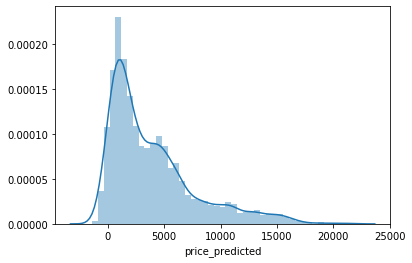

In [43]:
sns.distplot(diam_rick['price_predicted'])

In [44]:
diam_rick.to_csv('./data/rick_diam_5.csv', index=False)

# Regression

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = diamonds[['carat', 'cut', 'clarity',
                  'color', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
y_pred

# RMSE

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
rmse

import seaborn as sns
sns.scatterplot(x= 'price' , y ='predicted', data=diamonds)

# Merge DataFrames

X = diam_rick [['carat','cut', 'clarity', 'color', 'depth', 'table', 'x', 'y', 'z']]
            
rick_price = model.predict(X)

In [ ]:
diam_rick['price_predicted']= rick_price

In [ ]:
diam_rick

In [ ]:
sns.distplot(diam_rick['price_predicted'])

In [ ]:
diam_rick.to_csv('./data/rick_diam_1.csv', index=False)

In [ ]:
for i in range (8):
    y_pred_rick = models_each_model[i].predict(X.loc[X['clarity']== (i+1)])
    diam_rick['price_predicted'].loc[diam_rick['clarity'] == (i+1)] = y_pred_rick  